In [1]:
library(fpp3)

── Attaching packages ──────────────────────────────────────────── fpp3 0.4.0 ──
✔ tibble      3.1.0     ✔ tsibble     1.0.0
✔ dplyr       1.0.5     ✔ tsibbledata 0.2.0
✔ tidyr       1.1.3     ✔ feasts      0.1.7
✔ lubridate   1.7.4     ✔ fable       0.3.0
✔ ggplot2     3.3.3     
── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()       masks base::date()
✖ dplyr::filter()         masks stats::filter()
✖ tsibble::intersect()    masks base::intersect()
✖ tsibble::interval()     masks lubridate::interval()
✖ dplyr::lag()            masks stats::lag()
✖ tsibble::new_interval() masks lubridate::new_interval()
✖ tsibble::setdiff()      masks base::setdiff()
✖ tsibble::union()        masks base::union()


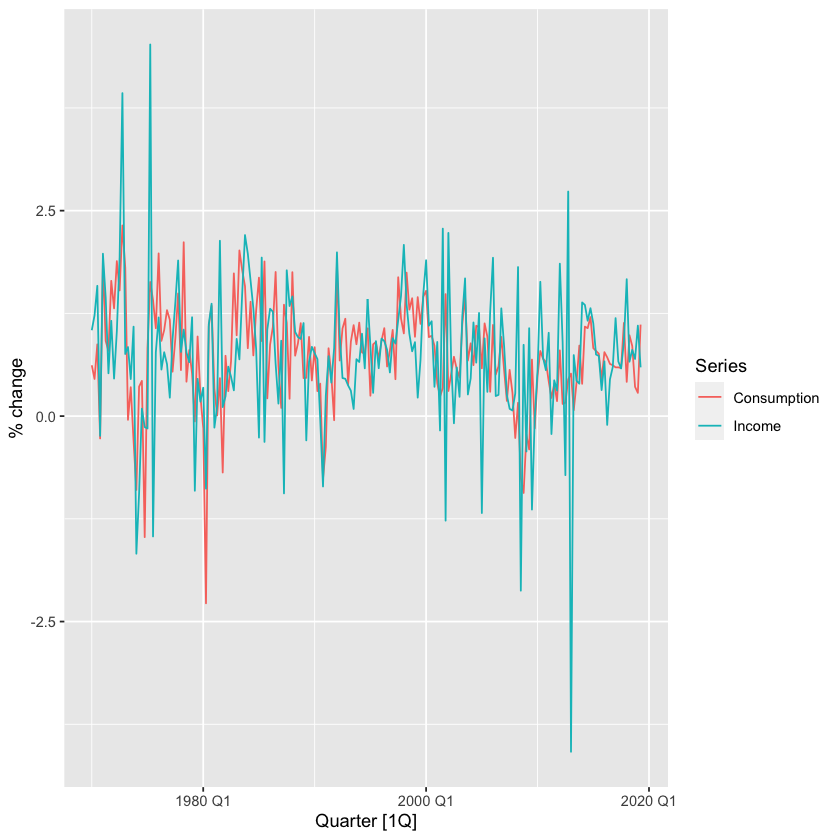

In [2]:
us_change %>%
    pivot_longer(c(Consumption, Income), names_to="Series") %>%
    autoplot(value) +
    labs(y = "% change")

`geom_smooth()` using formula 'y ~ x'


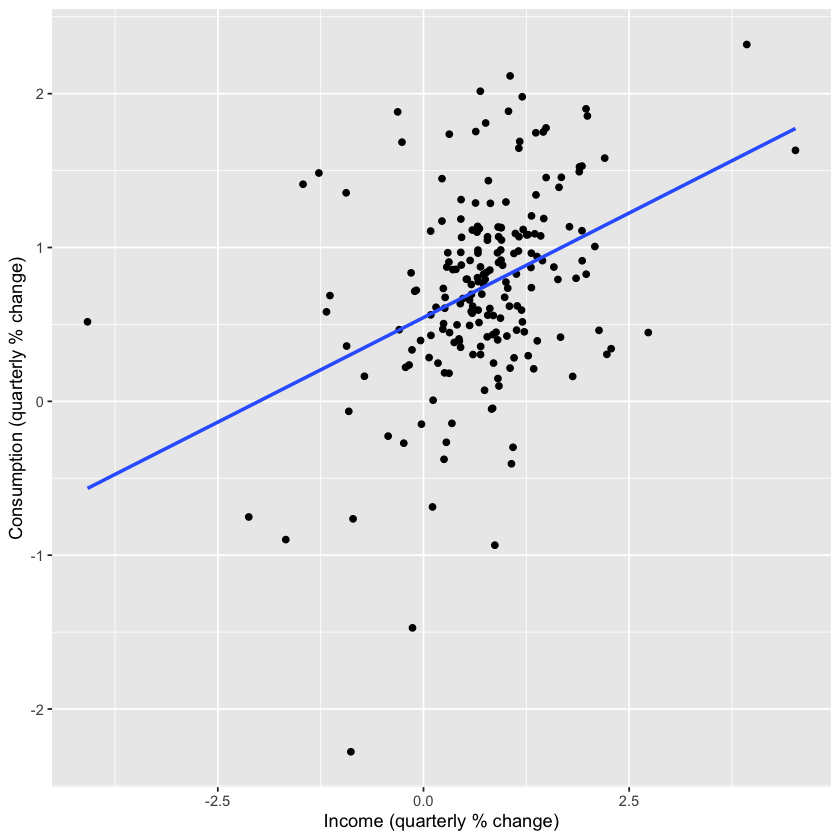

In [3]:
us_change %>%
    ggplot(aes(Income, Consumption)) +
    labs(y = "Consumption (quarterly % change)", x = "Income (quarterly % change)") +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE)

In [4]:
us_change %>%
    model(TSLM(Consumption ~ Income)) %>%
    report

Series: Consumption 
Model: TSLM 

Residuals:
     Min       1Q   Median       3Q      Max 
-2.58236 -0.27777  0.01862  0.32330  1.42229 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.54454    0.05403  10.079  < 2e-16 ***
Income       0.27183    0.04673   5.817  2.4e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5905 on 196 degrees of freedom
Multiple R-squared: 0.1472,	Adjusted R-squared: 0.1429
F-statistic: 33.84 on 1 and 196 DF, p-value: 2.4022e-08


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


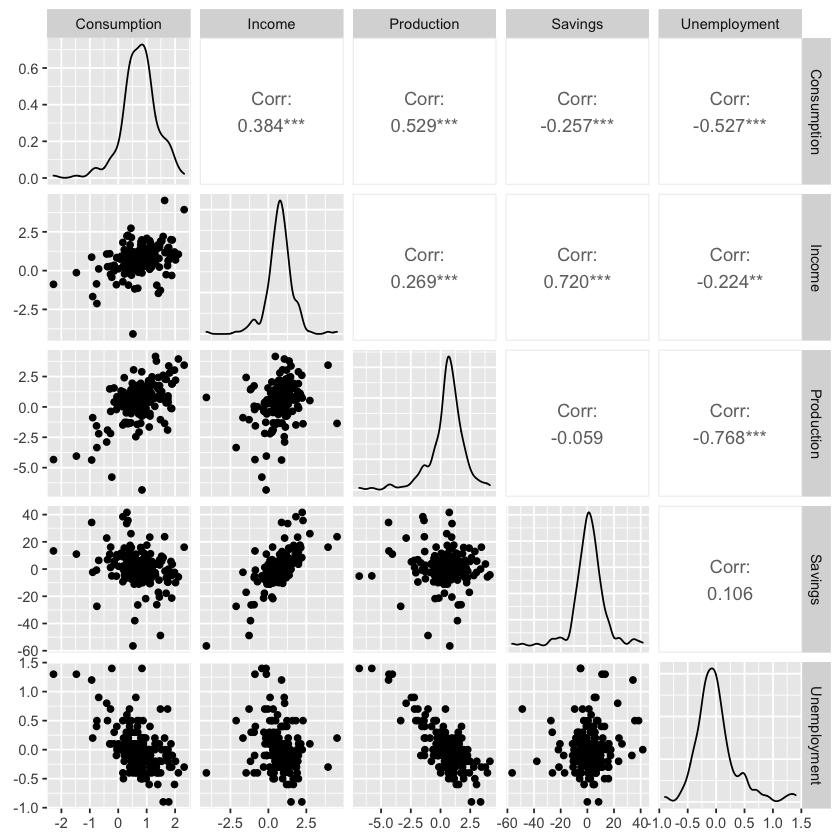

In [5]:
us_change %>%
    GGally::ggpairs(columns = 2:6)

In [6]:
fit.consMR <- us_change %>%
    model(tslm = TSLM(Consumption ~ Income + Production + Unemployment + Savings))

fit.consMR %>% report()

Series: Consumption 
Model: TSLM 

Residuals:
     Min       1Q   Median       3Q      Max 
-0.90555 -0.15821 -0.03608  0.13618  1.15471 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.253105   0.034470   7.343 5.71e-12 ***
Income        0.740583   0.040115  18.461  < 2e-16 ***
Production    0.047173   0.023142   2.038   0.0429 *  
Unemployment -0.174685   0.095511  -1.829   0.0689 .  
Savings      -0.052890   0.002924 -18.088  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3102 on 193 degrees of freedom
Multiple R-squared: 0.7683,	Adjusted R-squared: 0.7635
F-statistic:   160 on 4 and 193 DF, p-value: < 2.22e-16


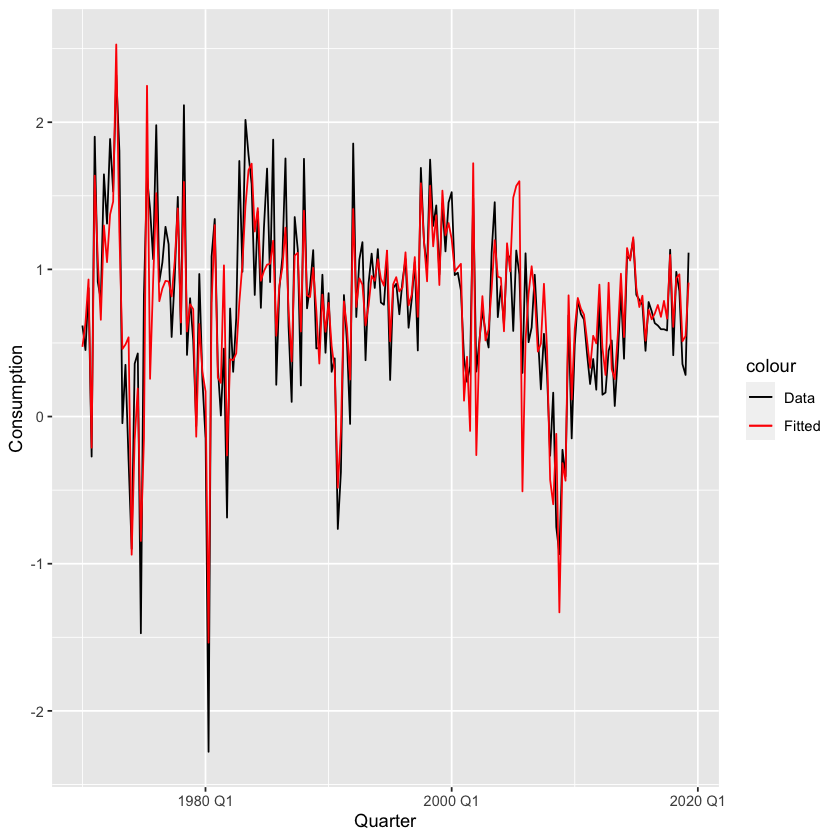

In [7]:
augment(fit.consMR) %>%
    ggplot(aes(Quarter)) +
    geom_line(aes(y = Consumption, color = "Data")) +
    geom_line(aes(y = .fitted, color = "Fitted")) +
    scale_color_manual(values=c(Data="black", Fitted="red"))

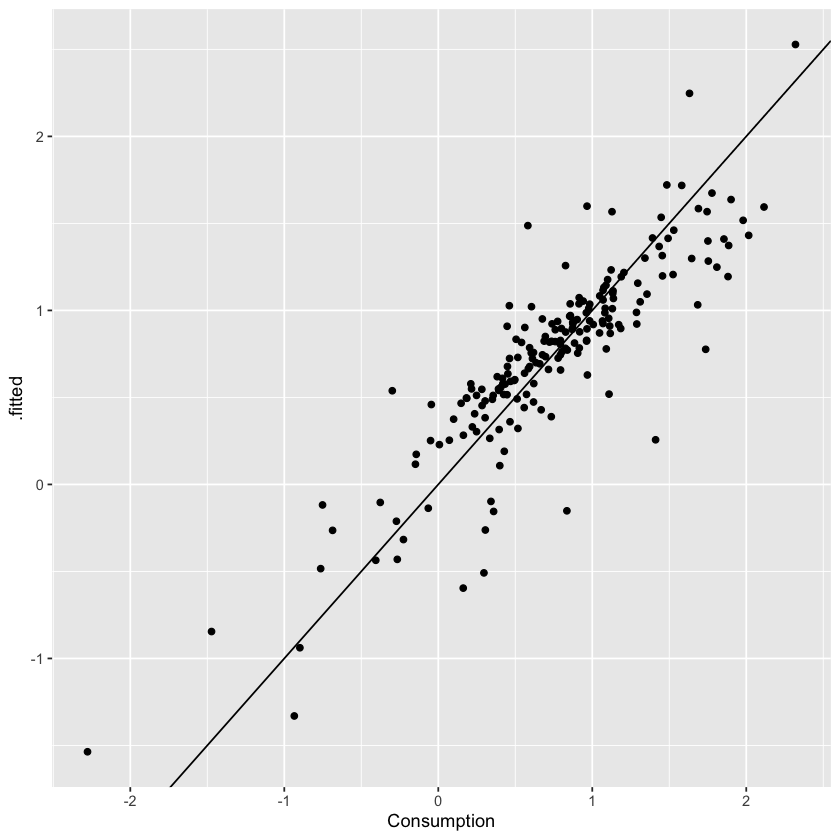

In [8]:
augment(fit.consMR) %>%
    ggplot(aes(Consumption, .fitted)) +
    geom_point() +
    geom_abline(intercept = 0, slope = 1)

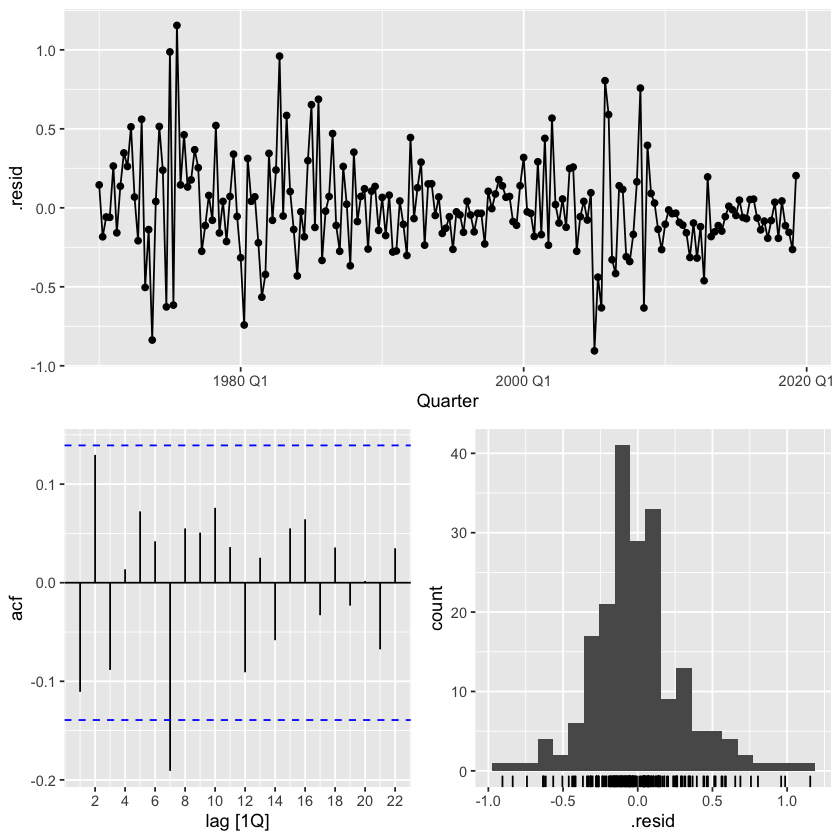

In [9]:
fit.consMR %>% gg_tsresiduals()

In [16]:
augment(fit.consMR) %>% features(.innov, ljung_box, lag = 10, dof = 5)

.model,lb_stat,lb_pvalue
tslm,18.86532,0.002036368


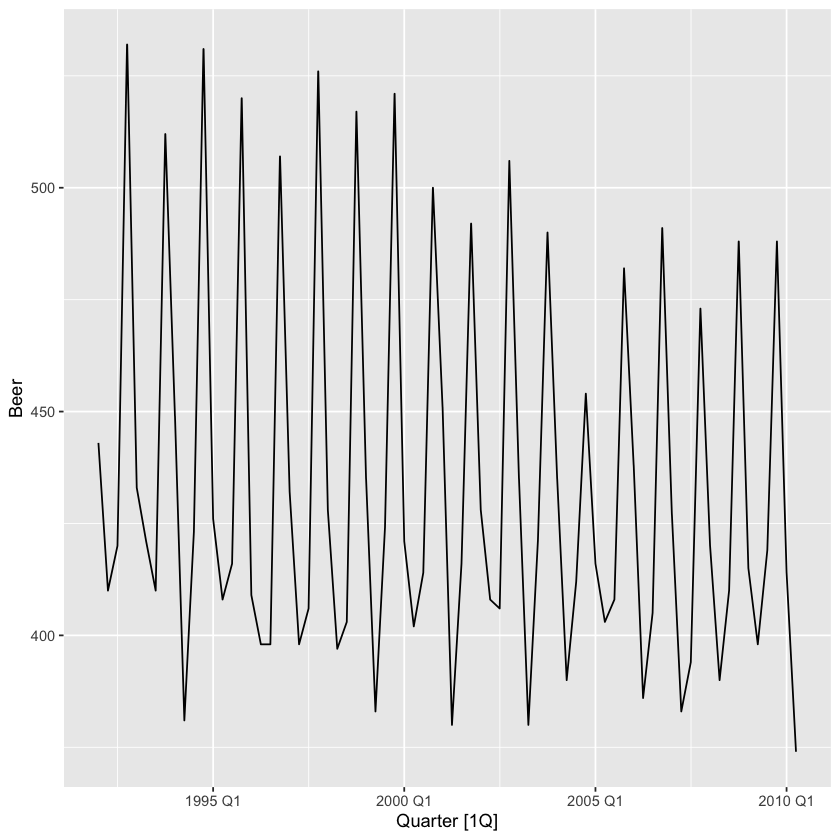

In [17]:
recent_production <- aus_production %>%
    filter(year(Quarter) >= 1992)

recent_production %>%
    autoplot(Beer)

In [18]:
fit_beer <- recent_production %>%
    model(TSLM(Beer ~ trend() + season()))

report(fit_beer)

Series: Beer 
Model: TSLM 

Residuals:
     Min       1Q   Median       3Q      Max 
-42.9029  -7.5995  -0.4594   7.9908  21.7895 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   441.80044    3.73353 118.333  < 2e-16 ***
trend()        -0.34027    0.06657  -5.111 2.73e-06 ***
season()year2 -34.65973    3.96832  -8.734 9.10e-13 ***
season()year3 -17.82164    4.02249  -4.430 3.45e-05 ***
season()year4  72.79641    4.02305  18.095  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.23 on 69 degrees of freedom
Multiple R-squared: 0.9243,	Adjusted R-squared: 0.9199
F-statistic: 210.7 on 4 and 69 DF, p-value: < 2.22e-16


$colour
$title
[1] "Series"

$title.position
NULL

$title.theme
NULL

$title.hjust
NULL

$title.vjust
NULL

$label
[1] TRUE

$label.position
NULL

$label.theme
NULL

$label.hjust
NULL

$label.vjust
NULL

$keywidth
NULL

$keyheight
NULL

$direction
NULL

$override.aes
named list()

$nrow
NULL

$ncol
NULL

$byrow
[1] FALSE

$reverse
[1] FALSE

$order
[1] 0

$available_aes
[1] "any"

$name
[1] "legend"

attr(,"class")
[1] "guide"  "legend"

attr(,"class")
[1] "guides"

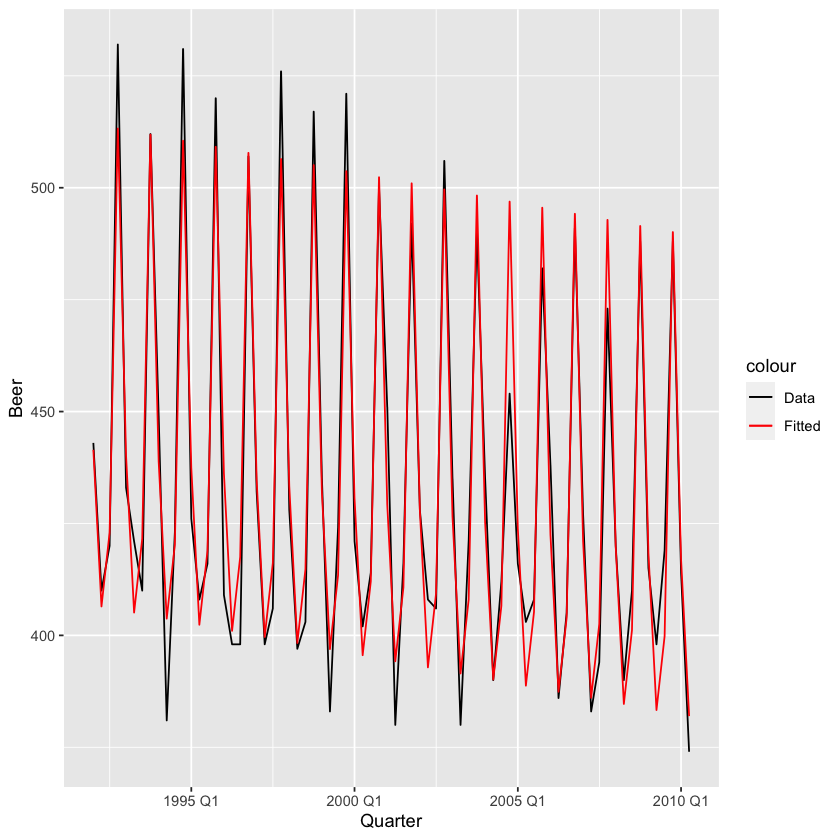

In [19]:
augment(fit_beer) %>%
    ggplot(aes(Quarter)) +
    geom_line(aes(y = Beer, colour = "Data")) +
    geom_line(aes(y = .fitted, colour = "Fitted")) +
    scale_color_manual(values = c(Data = "black", Fitted = "red"))
    guides(color = guide_legend(title = "Series"))

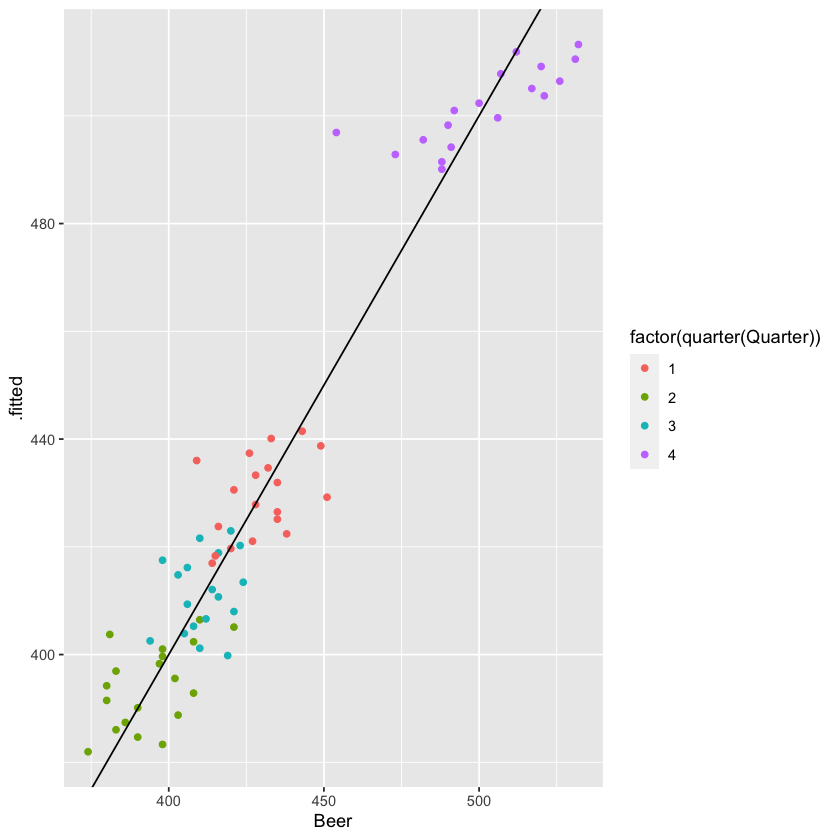

In [21]:
augment(fit_beer) %>%
    ggplot(aes(Beer, .fitted, color = factor(quarter(Quarter)))) +
    geom_point() +
    geom_abline(intercept = 0, slope = 1)